In [1116]:
#importing stuff
import numpy as np 
import sep

In [1117]:
#additional setup for reading the test image and displaying plots
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.] 

In [1118]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/lilywohlstadter


In [1119]:
#read image into standard 2-d numpy array
data = astropy.io.fits.getdata("../lilywohlstadter/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

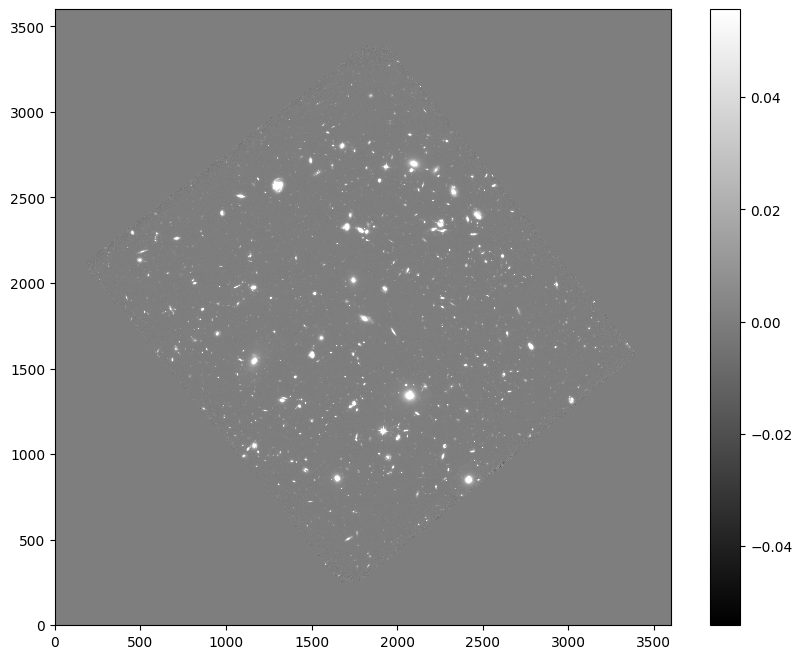

In [1120]:
#show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar(); 
plt.savefig('plot5.png')

In [1121]:
#measure a spatially varying background on the image 
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [1122]:
#get a "global" mean and noise of the image background
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [1123]:
#evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
#bkg_image = np.array(bkg) # equivalent to above

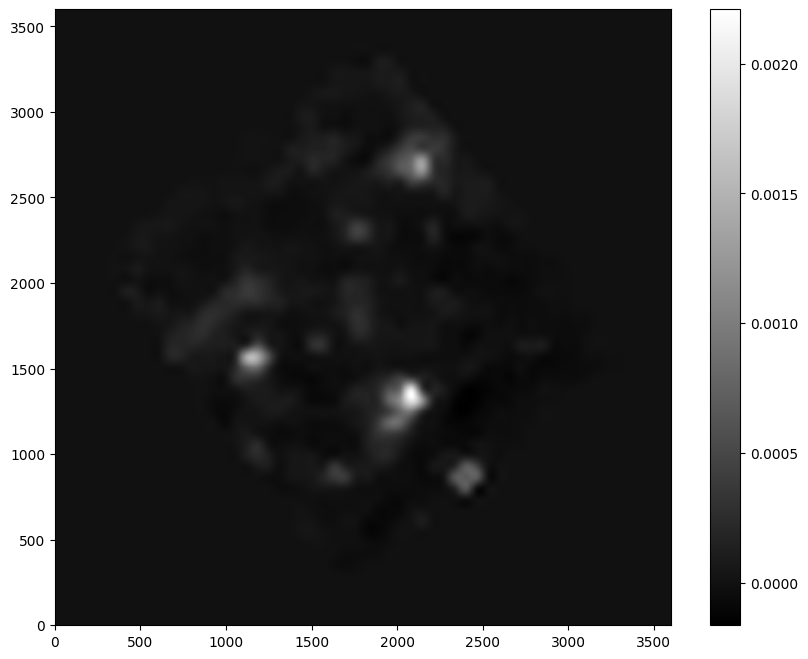

In [1124]:
#show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('plot6.png')

In [1125]:
#evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

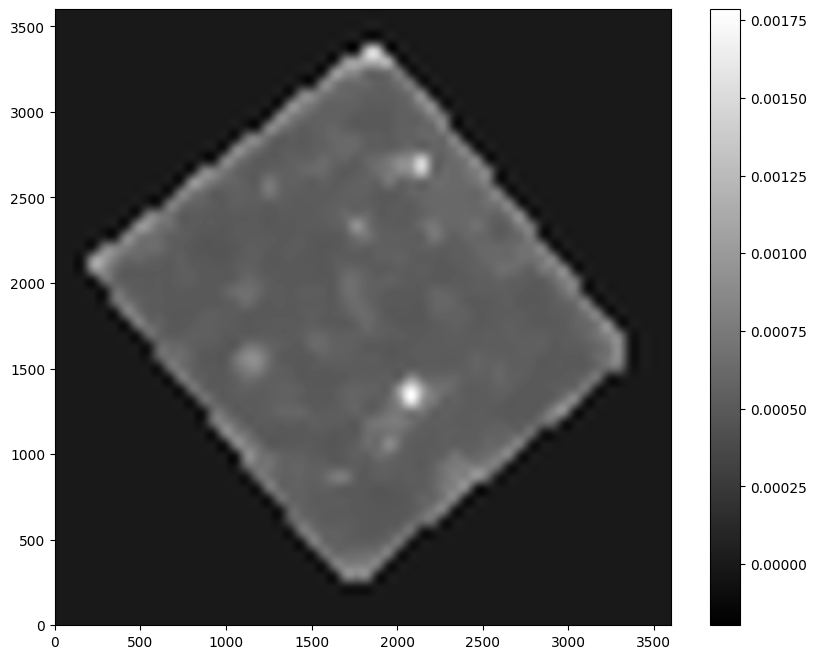

In [1126]:
#show the background noise 
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('plot7.png')

In [1127]:
#subtract the background
data_sub = data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [1128]:
#how many objects were detected
len(objects)

8640

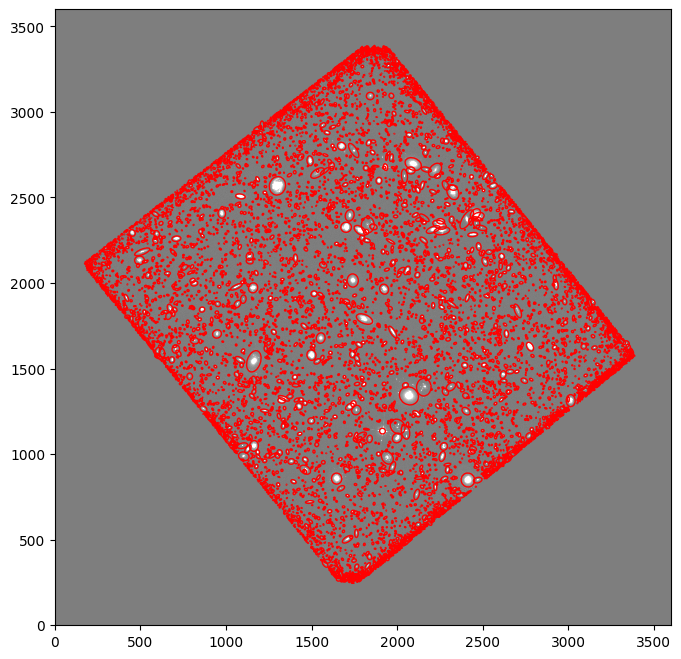

In [1129]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('plot8.png')

In [1130]:
#available fields 
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [1131]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [1132]:
#show the first 10 objects results 
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [1133]:
print (objects['flux'][0]) 

0.03645861893892288


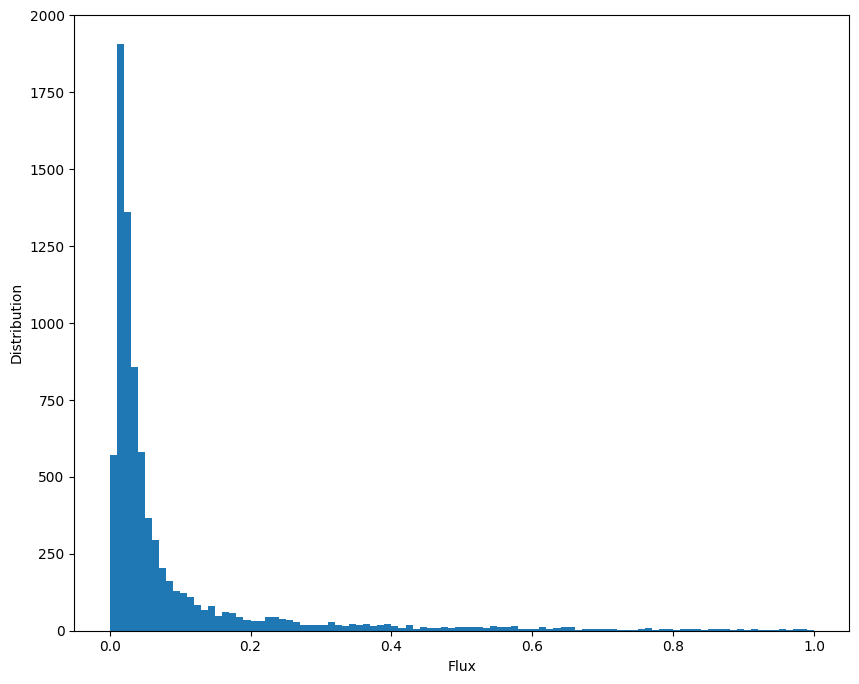

In [1134]:
#make an array of fluxes
objectFlux = objects['flux']

bin_width=0.01
min_edge=0
max_edge=1
bins = np.arange(min_edge, max_edge +bin_width, bin_width)

#label axis, show the histogram
plt.xlabel('Flux')
plt.ylabel('Distribution')
plt.hist(objectFlux, bins=bins)
plt.show()


In [1135]:
#finding the mean, median, max, min, standard deviation, and variance
mean_value = np.mean(objectFlux)
median_value = np.median(objectFlux)
max_value = np.max(objectFlux)
min_value = np.min(objectFlux)
std_dev = np.std(objectFlux)
variance = np.var(objectFlux)

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Maximum: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

Mean: 1.1726778032851009
Median: 0.034888697788119316
Maximum: 1218.3980712890625
Min: 0.0048383548855781555
Standard Deviation: 17.5474209122515
Variance: 307.9119806717212


In [1136]:
#finding the flux largest outlier and how many standard deviations from the mean it is

max_value_index = np.argmax(objectFlux)

print(f"The largest outlier in the distrubtion has a flux of:{objectFlux[max_value_index]}")
print(f"Standard deviations away from the mean: {(objectFlux[max_value_index]- mean_value) / std_dev}")

The largest outlier in the distrubtion has a flux of:1218.3980712890625
Standard deviations away from the mean: 69.3677663271825


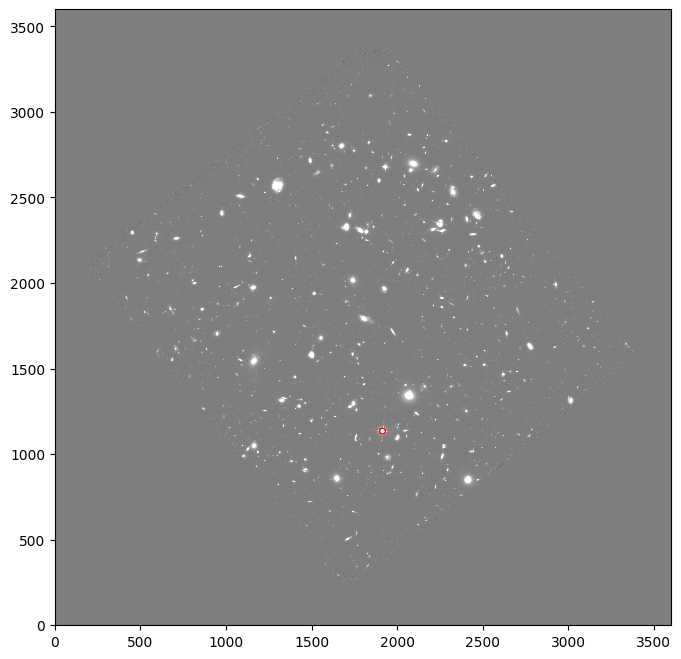

In [1137]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse 
e = Ellipse(xy=(objects['x'][max_value_index], objects['y'][max_value_index]),
            width=6*objects['a'][max_value_index],
            height=6*objects['b'][max_value_index],
            angle=objects['theta'][max_value_index] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)

#this shows where it is on the image 

In [1138]:
from astropy.io import fits

In [1139]:
#define file names
f105w = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
f125w = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f160w = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

#read in data
hdu_2 = fits.open(f105w)
hdu_3 = fits.open(f125w)
hdu_4 = fits.open(f160w)

#get image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

In [1140]:
#rescale data

def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

In [1141]:
def fits_quicklook(data, fnx=10, fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin, vmax=vpmax)

In [1142]:
#use rescaled images
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)


In [1143]:
#limit data to be between min and max values in the rescaling
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2min
data_3_res[data_3_res<d2min] = d3min
data_3_res[data_3_res>d2max] = d3max
data_4_res[data_4_res<d2min] = d4min
data_4_res[data_4_res>d2max] = d4max

In [1144]:
#create rbg image
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

In [1145]:
#normalize data ?
norm_f105w = (data_2 - np.min(data_2)) / (np.max(data_2) - np.min(data_2))
norm_f125w = (data_3 - np.min(data_3)) / (np.max(data_3) - np.min(data_3))
norm_f160w = (data_4 - np.min(data_4)) / (np.max(data_4) - np.min(data_4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


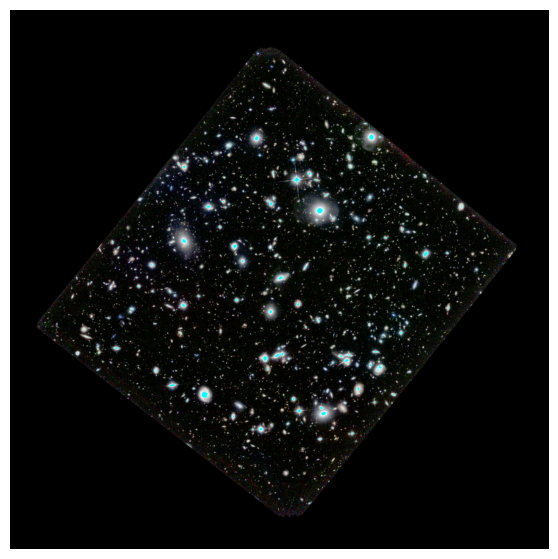

In [1146]:
#plot the rgb image, save to png
f,ax = plt.subplots(1,1,figsize=(7,7))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('rgb_stuff_final.png',bbox_inches='tight',pad_inches=0,dpi=600)
